<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Introduction to binary classification using logistic regression
© ExploreAI Academy

In this train, we'll build and refine a logistic regression model to solve a binary classification problem.

## Learning objectives

By the end of this train, you should be able to;
- Understand logistic regression.
- Implement a logistic regression model in sklearn.

## Introduction
The Breast Cancer Wisconsin (Diagnostic) dataset is a classic and very easy binary classification dataset. It contains features computed from a digitised image of a fine needle aspirate (FNA) of a breast mass, where each instance represents information related to a breast cancer cell nucleus. The goal is to classify whether the cell nuclei are **malignant** or **benign** based on these attributes.

The dataset contains **30 numerical features**, such as mean radius, texture, perimeter, area, smoothness, compactness, and several others derived from the cell nuclei images. The target variable is binary: **malignant or benign**.

First, let's load and examine our dataset:

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# list of features
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Exercises

### Exercise 1: Exploratory data analysis (EDA)
Perform an exploratory data analysis on the Breast Cancer dataset. Focus on understanding the distribution of various features and the target variable. Create visualisations to understand the relationships between features and the target variable.

1. To get a general idea of the characteristics of our data, plot the distribution of some of the features. Would we need to do this for all of the features in a real-world situation?
   
   **NOTE**: Use `mean radius` and `mean texture`.
2. Create a correlation heatmap to identify the relationships between features.
3. Analyse the balance between malignant and benign samples in the dataset.

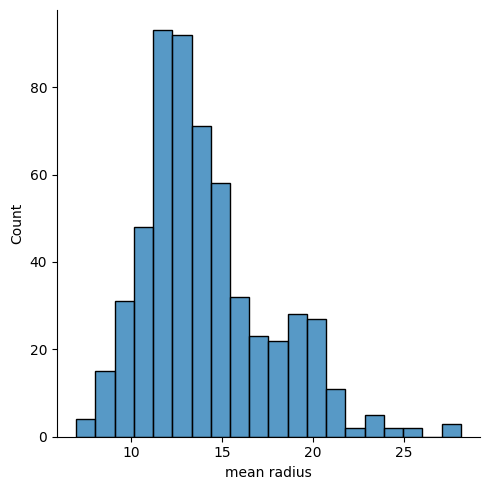

In [18]:
# insert code here
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=["target"])

sns.displot(df_features["mean radius"], bins=20)
plt.show()

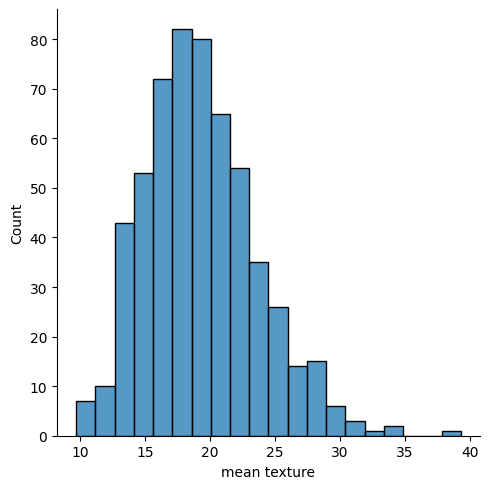

In [20]:
sns.displot(df_features["mean texture"], bins=20)
plt.show()

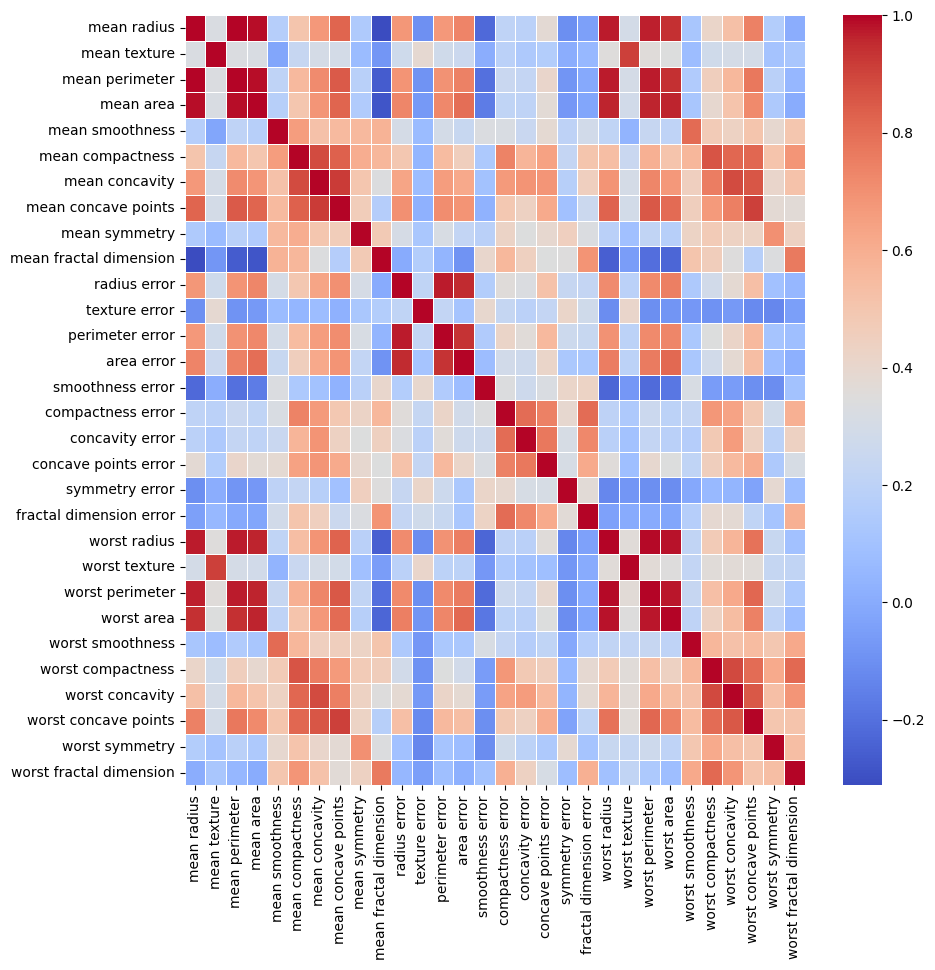

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_features.corr(), cmap="coolwarm", linewidth=.5)
plt.show()

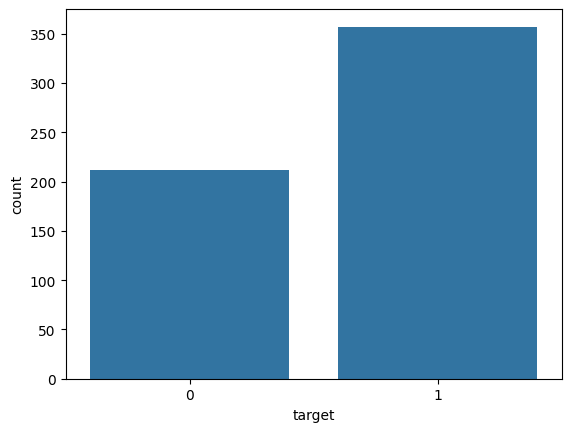

In [25]:
# Balance of target variable
sns.countplot(x='target', data=df_target)
plt.show()

### Exercise 2: Data preparation and model training
Prepare the dataset for logistic regression. 

1. Split the data into training and test sets.
2. Normalise the features using `StandardScaler` from `sklearn.preprocessing`.
3. Train a logistic regression model on the training data.

In [32]:
# insert code here
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
                                            data.data,
                                            data.target, 
                                            test_size=0.2, 
                                            random_state=42, 
                                            stratify=data.target
                                            ) 

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
y_scaler = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_scaler, y_train)

LogisticRegression()

### Exercise 3: Model evaluation and interpretation
Evaluate the performance of your logistic regression model and interpret the results.

1. Calculate and interpret the model's accuracy on the test set.
2. Use a confusion matrix and classification report to evaluate your model's performance.
3. Interpret the model coefficients: identify and discuss the top 3 features that contribute most to predicting malignancy in cell nuclei.

In [42]:
# insert code here
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(y_scaler)
# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")
# Interpret model coefficients
coefficients = pd.DataFrame(model.coef_[0], index=data.feature_names, columns=['Coefficient'])
top_features = coefficients.abs().sort_values('Coefficient', ascending=False).head(3)
print("Top 3 features contributing to malignancy prediction:")
print(top_features)

Model accuracy: 0.9824561403508771
Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Top 3 features contributing to malignancy prediction:
                      Coefficient
worst texture            1.255088
radius error             1.082965
worst concave points     0.953686


### Challenge Exercise: Model improvement
Attempt to improve our model's performance through at least one of the following techniques:
- **Feature selection**: Select a subset of relevant features to train your model.
- **Hyperparameter tuning**: Experiment with different values for the hyperparameters of the logistic regression model (e.g., `C`, the regularisation strength).

In [44]:
# insert code here
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
X_train_selected = selector.fit_transform(X_scaler, y_train)
X_test_selected = selector.transform(X_scaler)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Evaluating the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test_selected))
best_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_selected))
best_class_report = classification_report(y_test, best_model.predict(X_test_selected))

# Output the improved results
print(f"Improved Model Accuracy: {best_accuracy}")
print(f"Improved Confusion Matrix:\n{best_conf_matrix}\n")
print(f"Improved Classification Report:\n{best_class_report}")

ValueError: Found input variables with inconsistent numbers of samples: [114, 455]

## Solutions

### Exercise 1: Exploratory data analysis (EDA)

This exercise is designed to visualise and understand the characteristics of the Breast Cancer dataset from `sklearn.datasets`. By looking at the outputs, we can understand the distribution of individual features, how features relate to each other, and the balance of classes in the target variable. This information is crucial for deciding on the next steps in the data analysis or model-building process, such as feature selection, feature engineering, and choosing appropriate algorithms for classification or regression tasks.

1. **Data import and DataFrame conversion:**
   
   This part of the code imports necessary libraries and converts the data into a `DataFrame` object, which is a 2D labelled data structure with columns of potentially different types. It's being used here to store features in `df_features` and the target variable in `df_target`.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for easier manipulation
df_features = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data.target, columns=['target'])

2. **Distribution Plots:**

   Here, distribution plots for the 'mean radius' and 'mean texture' are created using Seaborn's `displot` function, with 20 bins specified for each histogram. These plots help visualise the distribution of these two features. The histograms are overlaid with kernel density estimates to show the distribution shape. 

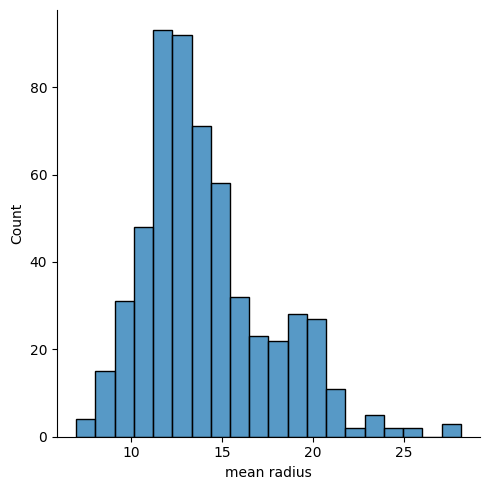

In [7]:
# mean radius distribution plot
sns.displot(df_features['mean radius'], bins=20)
plt.show()


From the results, we can see that 'mean radius' has a roughly normal distribution skewed to the right.

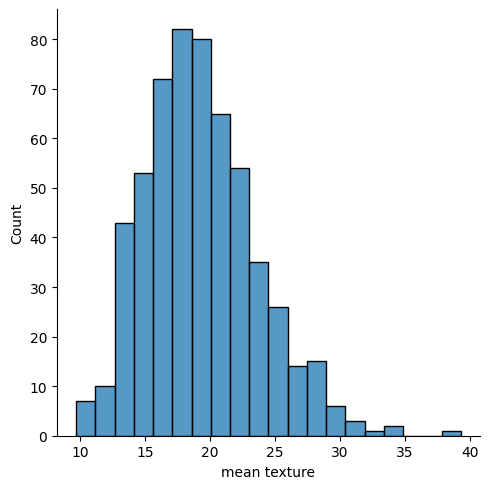

In [8]:
# mean texture distribution plot
sns.displot(df_features['mean texture'], bins=20)
plt.show()

`mean texture`, on the other hand, is more normally distributed.

3. **Correlation heatmap:**
  
   The code below generates a heatmap of the correlation matrix of the features in `df_features`. The heatmap uses a color scheme to indicate the strength and direction of correlations, with red representing a strong positive correlation, blue a strong negative correlation, and white no correlation. 

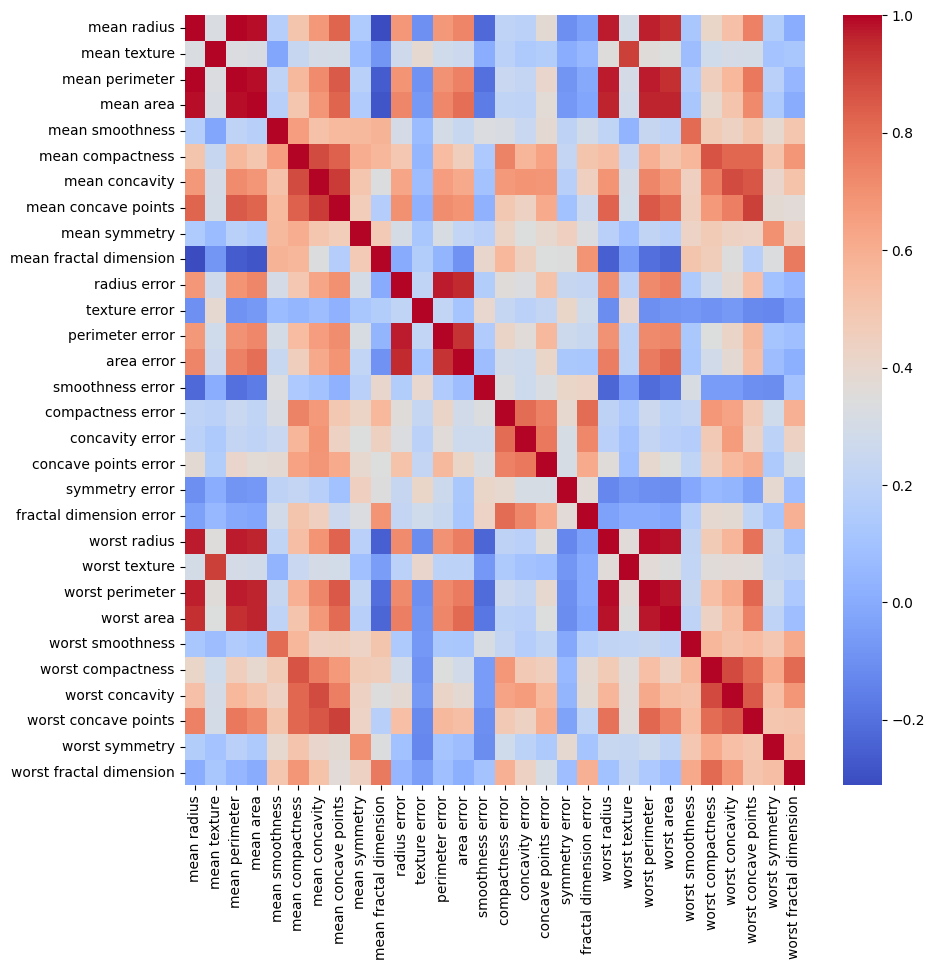

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_features.corr(), annot=False, cmap='coolwarm')
plt.show()

Here are some interpretations and how this information can be used:

- **Feature selection for Machine Learning models**: High positive or negative correlations (indicated by red or blue colors, respectively) suggest that two features have a linear relationship. When features are highly correlated with one another (multicollinearity), it can be redundant to use all of them in a machine learning model. This information can be used to select a subset of features that provides the most information, which can improve the model's performance and reduce overfitting.

- **Understanding data structure and relationships**: Correlations can reveal the underlying structure of the data. For example, a strong positive correlation between 'mean radius' and 'mean perimeter' might suggest that as the radius of a cell nucleus increases, so does its perimeter. This understanding can be vital in domains like biology or medicine, where understanding the relationships between different measurements can provide insights into the nature of cells or tumours being studied.

4. **Balance of target variable:**

   Lastly, we plot the distribution of the target variable using a `countplot`, showing the count of each class in the target variable. 

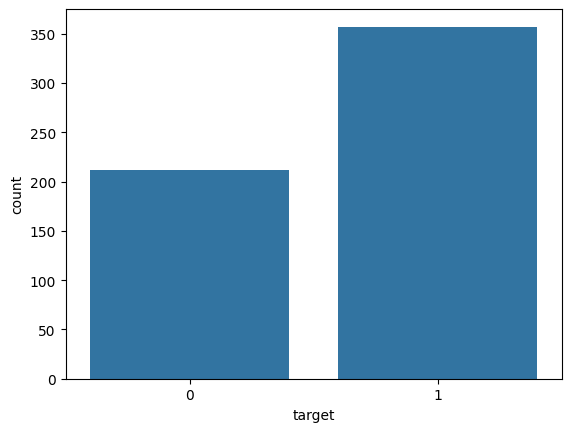

In [10]:
# Balance of target variable
sns.countplot(x='target', data=df_target)
plt.show()

The image is the output, where '0' and '1' represent malignant and benign conditions, respectively. The `countplot` indicates whether the dataset is balanced between these classes or if there is class imbalance.

In our case class '1' has a higher count than class '0', indicating that there are more instances of class '1' in the dataset. This could be an indication of **imbalance** in class distribution or an implication that **accuracy** might not be a suitable performance metric as the model could simply predict the majority class for all instances and still achieve a deceptively high accuracy.

### Exercise 2: Data preparation and model training

Using insights gained from the EDA of the Breast Cancer dataset, we prepare the data for logistic regression by following these steps:

1. **Split the data**: Given the observed class imbalance in the target variable, it's essential to maintain this distribution across training and testing datasets. We therefore use stratified splitting to ensure that both datasets represent the initial class proportions accurately.
   
2. **Normalise the features**: The EDA showed that the 'mean radius' is right-skewed and 'mean texture' is normally distributed. Normalisation will adjust the features to have a mean of zero and a standard deviation of one, which will help the logistic regression model to converge more efficiently since it assumes features follow a normal distribution.

   **NOTE: Correlation consideration**: Correlation heatmaps reveal how features are related. If certain features are highly correlated, they may carry redundant information. To mitigate multicollinearity, we might consider feature selection or dimensionality reduction techniques. However, for the purpose of this exercise, we'll proceed with all features, but keep in mind that in practice, we may want to address this.

3. **Train the model**: Fit a logistic regression model to the normalised training data. Since logistic regression can be sensitive to feature scaling, this step is crucial to ensure the model performs optimally.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Step 1: Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    data.data, 
    data.target, 
    test_size=0.2, 
    random_state=42,
    stratify=data.target  # This ensures training and test sets have similar class proportions
)

# Step 2: Normalise the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

The steps and corresponding code reflect the importance of applying EDA findings to the data preparation and modelling process. This ensures that the model training is as informed and effective as possible.

### Exercise 3: Model evaluation and interpretation

In this exercise, we evaluate the performance of the logistic regression model built on the Breast Cancer dataset and interpret the outcomes. By leveraging the insights from our EDA and the data preparation steps, we aim to understand not just the performance metrics but also what they tell us about the model's predictive abilities in the context of medical diagnosis.

1. **Model accuracy assessment:** First, we assess the model's accuracy on the test set, which will give us a baseline understanding of its performance. Given the class imbalance noted during the EDA, we acknowledge that accuracy alone may not be the best measure of performance. Nevertheless, it provides a quick indication of overall effectiveness.

2. **Advanced performance metrics:** A confusion matrix and classification report will provide a more nuanced view of the model's performance, including metrics like **precision**, **recall**, and **F1-score**. These are crucial in the medical field where the cost of false negatives could be significantly higher than false positives. 

3. **Coefficient analysis:** Finally, we interpret the coefficients of the model to identify which features most strongly predict the presence of malignancy in cell nuclei. This links back to our EDA findings, where we observed certain features distributions and correlations. Understanding which features are most influential can also inform medical professionals regarding indicators of cancer severity.

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f"Model accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))
class_report = classification_report(y_test, model.predict(X_test_scaled))
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")

# Interpret model coefficients
coefficients = pd.DataFrame(model.coef_[0], index=data.feature_names, columns=['Coefficient'])
top_features = coefficients.abs().sort_values('Coefficient', ascending=False).head(3)
print("Top 3 features contributing to malignancy prediction:")
print(top_features)

Model accuracy: 0.9824561403508771
Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Top 3 features contributing to malignancy prediction:
                      Coefficient
worst texture            1.255088
radius error             1.082965
worst concave points     0.953686


The *model's accuracy* is 98.25%, indicating that it **correctly predicts** the outcome for a high proportion of cases in the test set. 

The *confusion matrix* shows that it made **only 1 false positive** (predicting malignancy when it is not present) and **1 false negative** (failing to predict malignancy when it is present), which are both very low. 

The *classification report* reinforces this, as the **precision**, **recall**, and **F1-score** for both classes are all high, demonstrating that the model is equally **good at predicting both classes**.

The *top three features* that contribute to predictions of malignancy are '`**worst texture**`', '`**radius error**`', and '`**worst concave points**`'. These features are the **most influential** in the logistic regression model, suggesting that they are key indicators of malignancy in breast cancer diagnosis. The high coefficients for these features mean that small changes in their values have a significant impact on the model's prediction.


**In conclusion**: By following these steps, we can ensure that the model evaluation is comprehensive and the results are interpreted with clinical relevance in mind.

### Challenge Exercise: Model improvement

It's now time to leverage our findings to improve our logistic regression model. Two potential strategies will be employed: 

1. **Feature selection:** Reflecting on the EDA, we consider the features that showed significant correlations and distinct distributions. We will identify a subset of features that are less correlated with each other but highly correlated with the target. This approach can reduce overfitting and improve model interpretability.

2. **Hyperparameter tuning:** Adjust the hyperparameters of the logistic regression model to optimise performance. The parameter '`C`', which controls the strength of regularisation, can be particularly influential. We'll use cross-validation to find the best value for '`C`' that balances the bias-variance trade-off.

#### Code for model improvement:

By following these steps, you will be able to not only improve your model's performance but also test the effect of each enhancement technique independently. This structured approach provides clarity on the impact of each method on model improvement and yields insights into which adjustments are most effective for this particular dataset and problem.

In [13]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# Evaluating the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = accuracy_score(y_test, best_model.predict(X_test_selected))
best_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_selected))
best_class_report = classification_report(y_test, best_model.predict(X_test_selected))

# Output the improved results
print(f"Improved Model Accuracy: {best_accuracy}")
print(f"Improved Confusion Matrix:\n{best_conf_matrix}\n")
print(f"Improved Classification Report:\n{best_class_report}")

Improved Model Accuracy: 0.9736842105263158
Improved Confusion Matrix:
[[40  2]
 [ 1 71]]

Improved Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



After model improvement, the accuracy slightly decreased to 97.37%. The new confusion matrix showed an additional false positive compared to the previous model, now making a total of 2 false positives but maintained only 1 false negative. The precision remained high, but there was a slight drop in recall for class '0', resulting in a lower F1-score for that class, which combines precision and recall into a single measure.

This slight decline in accuracy and recall for class '0' after feature selection and hyperparameter tuning suggests that while the model remains very accurate, the reduction of features and adjustment of hyperparameters may have led to it being slightly less sensitive to the minority class (class '0'). Simply put, the original model was already performing at a high level, leaving little room for improvement. However, the model still performs well overall, with high precision and F1-scores, which are critical in a clinical setting.

It is also important to note that in different contexts, even a small improvement, or maintaining high performance while reducing the model complexity (fewer features), can be valuable.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>